In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [9]:
#Loading Data

df=pd.read_excel('Tech_Layoffs 2020-23.xlsx')

In [ ]:

#PREPROCESS


In [10]:
def add(x):                       
    return x*100

In [11]:
df['Layoff %']=df['Layoff %'].apply(add)        # (or) df['Layoff %']*100

In [12]:
df['date'] = pd.to_datetime(df['Layoff Date'])
df['month'] = pd.to_datetime(df['date']).dt.strftime('%B')
df['year'] = df['date'].dt.year                                 # (or) df['year'] = pd.to_datetime(df[date]).dt.strftime('%Y')

df['month'] = df['month'].astype(str)
df['year'] = df['year'].astype(int)

In [ ]:

#REMOVE UNWANTED ROWS OR COLUMS


In [13]:

df.set_index('#', inplace=True)      # to replace the default index


In [16]:
#Checking for null values

df.isna().sum()

Company            0
Location HQ        0
Laid Off Count     0
Layoff Date        0
Layoff %           0
Industry           0
$ Raised Profit    0
Country            0
date               0
month              0
year               0
dtype: int64

In [15]:
#Filling by mean() of its own

df['Laid Off Count'].fillna(value = df['Laid Off Count'].mean(),inplace=True)
df['Laid Off Count']=df['Laid Off Count'].astype(int)

df['Layoff %'].fillna(value = df['Layoff %'].mean(),inplace=True)
df['Layoff %']=df['Layoff %'].astype(int)

df['$ Raised Profit'].fillna(value = df['$ Raised Profit'].mean(),inplace=True)
df['$ Raised Profit']=df['$ Raised Profit'].astype(int)

df['Industry'].fillna(value = 'Other', inplace=True)

In [17]:
#Checking dtype is numeric

from pandas.api.types import is_numeric_dtype

num_cols = ['Laid Off Count','Layoff %','$ Raised Profit']
cols = df.columns
for i in cols:
    if is_numeric_dtype(df[i]) == False:
        print(i)

Company
Location HQ
Layoff Date
Industry
Country
date
month


In [ ]:

#EDA


Text(0.5, 1.0, 'LAYOFFS (2020-2023)')

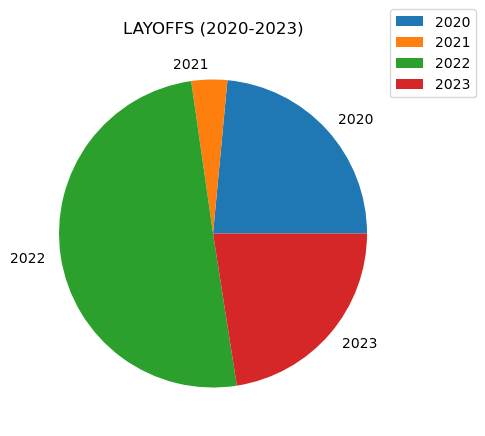

In [18]:
#Yearwise layoff count

total = df.groupby('year').sum()

total.plot.pie(y='Laid Off Count',figsize=(5,5))
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.ylabel('')
plt.title('LAYOFFS (2020-2023)')

In [19]:
#order dataframe using layoff count

df.sort_values('Laid Off Count',ascending=False,inplace=True)

Text(0, 0.5, 'Layoffs')

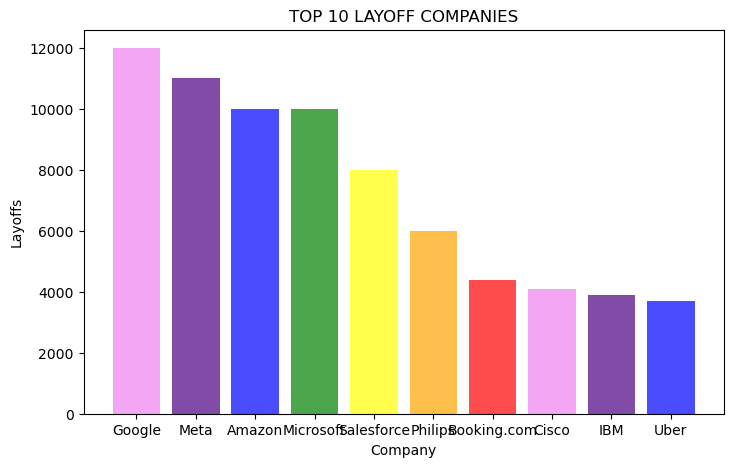

In [20]:
#Top 10 layoff companies

df = df.drop_duplicates(subset='Company')

x = df['Company'].head(10).astype(str)
y = df['Laid Off Count'].head(10)

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.0,0.8])

ax = axes.bar(x, y,color=['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red'],alpha=0.7)
axes.set_title('TOP 10 LAYOFF COMPANIES')
axes.set_xlabel("Company")
axes.set_ylabel("Layoffs")

Text(0, 0.5, 'HQ Location')

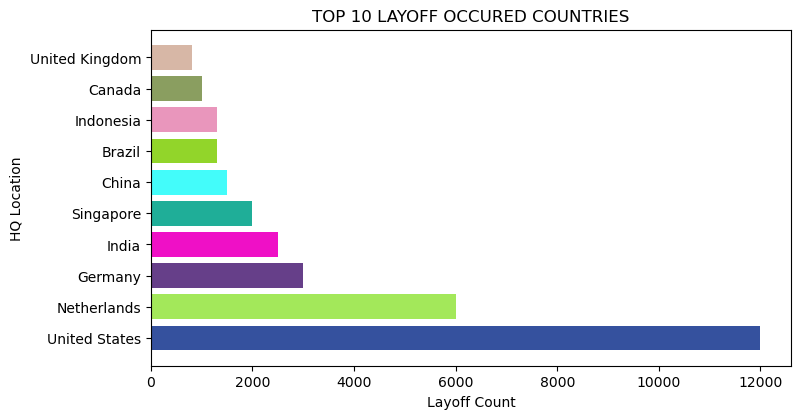

In [21]:
#Top10 layoff occured countries

df = df.drop_duplicates(subset='Country')

x = df['Country'].head(10).astype(str)
y = df['Laid Off Count'].head(10)

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1.0,0.7])

colors = [
    (random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
    for i in range(len(df))
]

axes.barh(x,y,color=colors)
axes.set_title('TOP 10 LAYOFF OCCURED COUNTRIES')
axes.set_xlabel("Layoff Count")
axes.set_ylabel("HQ Location")

Text(0, 0.5, 'Layoffs')

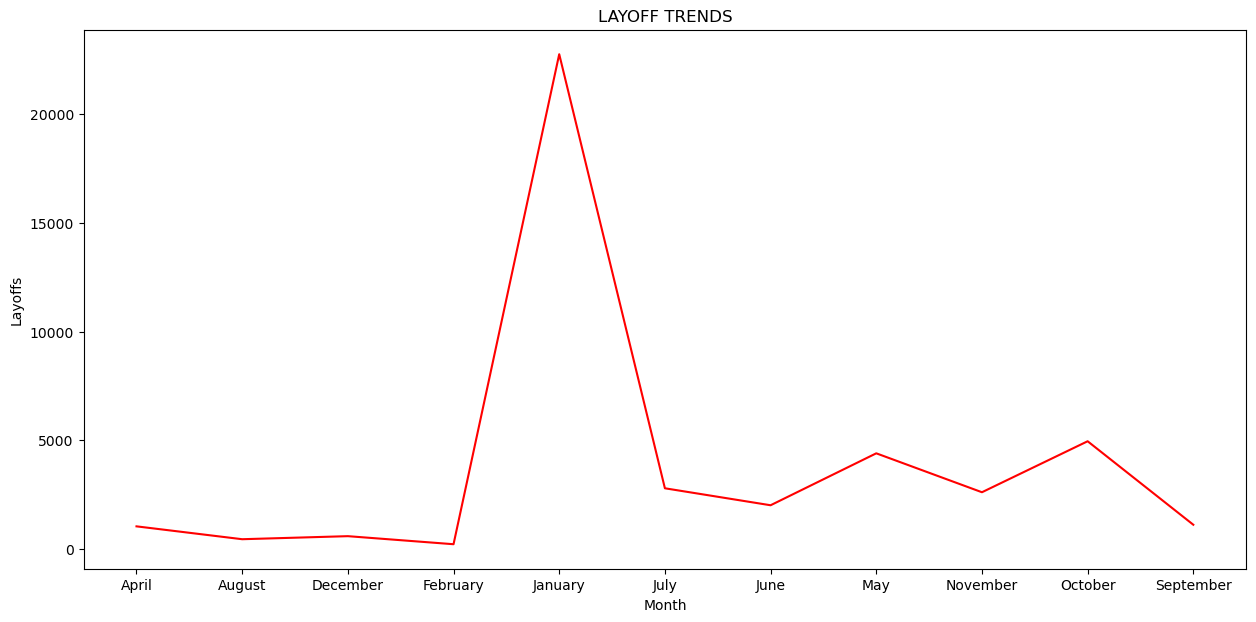

In [22]:
#Layoff trends by month

GrpBy = df.groupby(["month"])["Laid Off Count"].sum()
GrpBy = GrpBy.reset_index()

plt.figure(figsize=(15,7))
sns.lineplot(x="month", y="Laid Off Count", data=GrpBy,color='red')
plt.title("LAYOFF TRENDS")
plt.xlabel("Month")
plt.ylabel("Layoffs")

Text(0.5, 1.0, 'LAID OFF DEPARTMENTS')

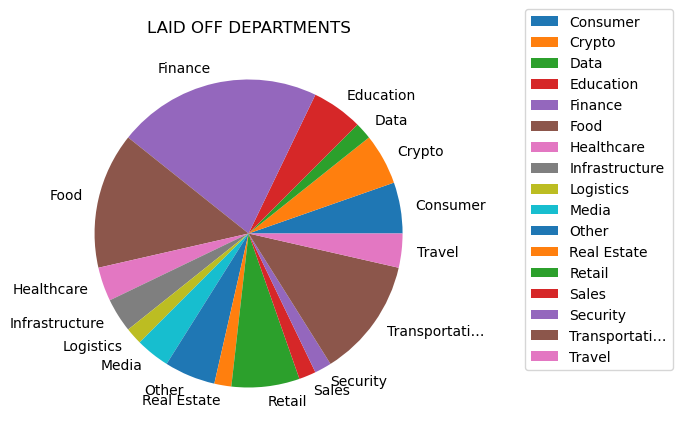

In [23]:
#Layoffs occured departments

total = df.groupby('Industry').count()

total.plot.pie(y='Layoff %',figsize=(5,5))
plt.title('LAYOFFS (2020-2023)')
plt.legend(bbox_to_anchor=(1.2,1.1))
plt.ylabel('')
plt.title('LAID OFF DEPARTMENTS')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

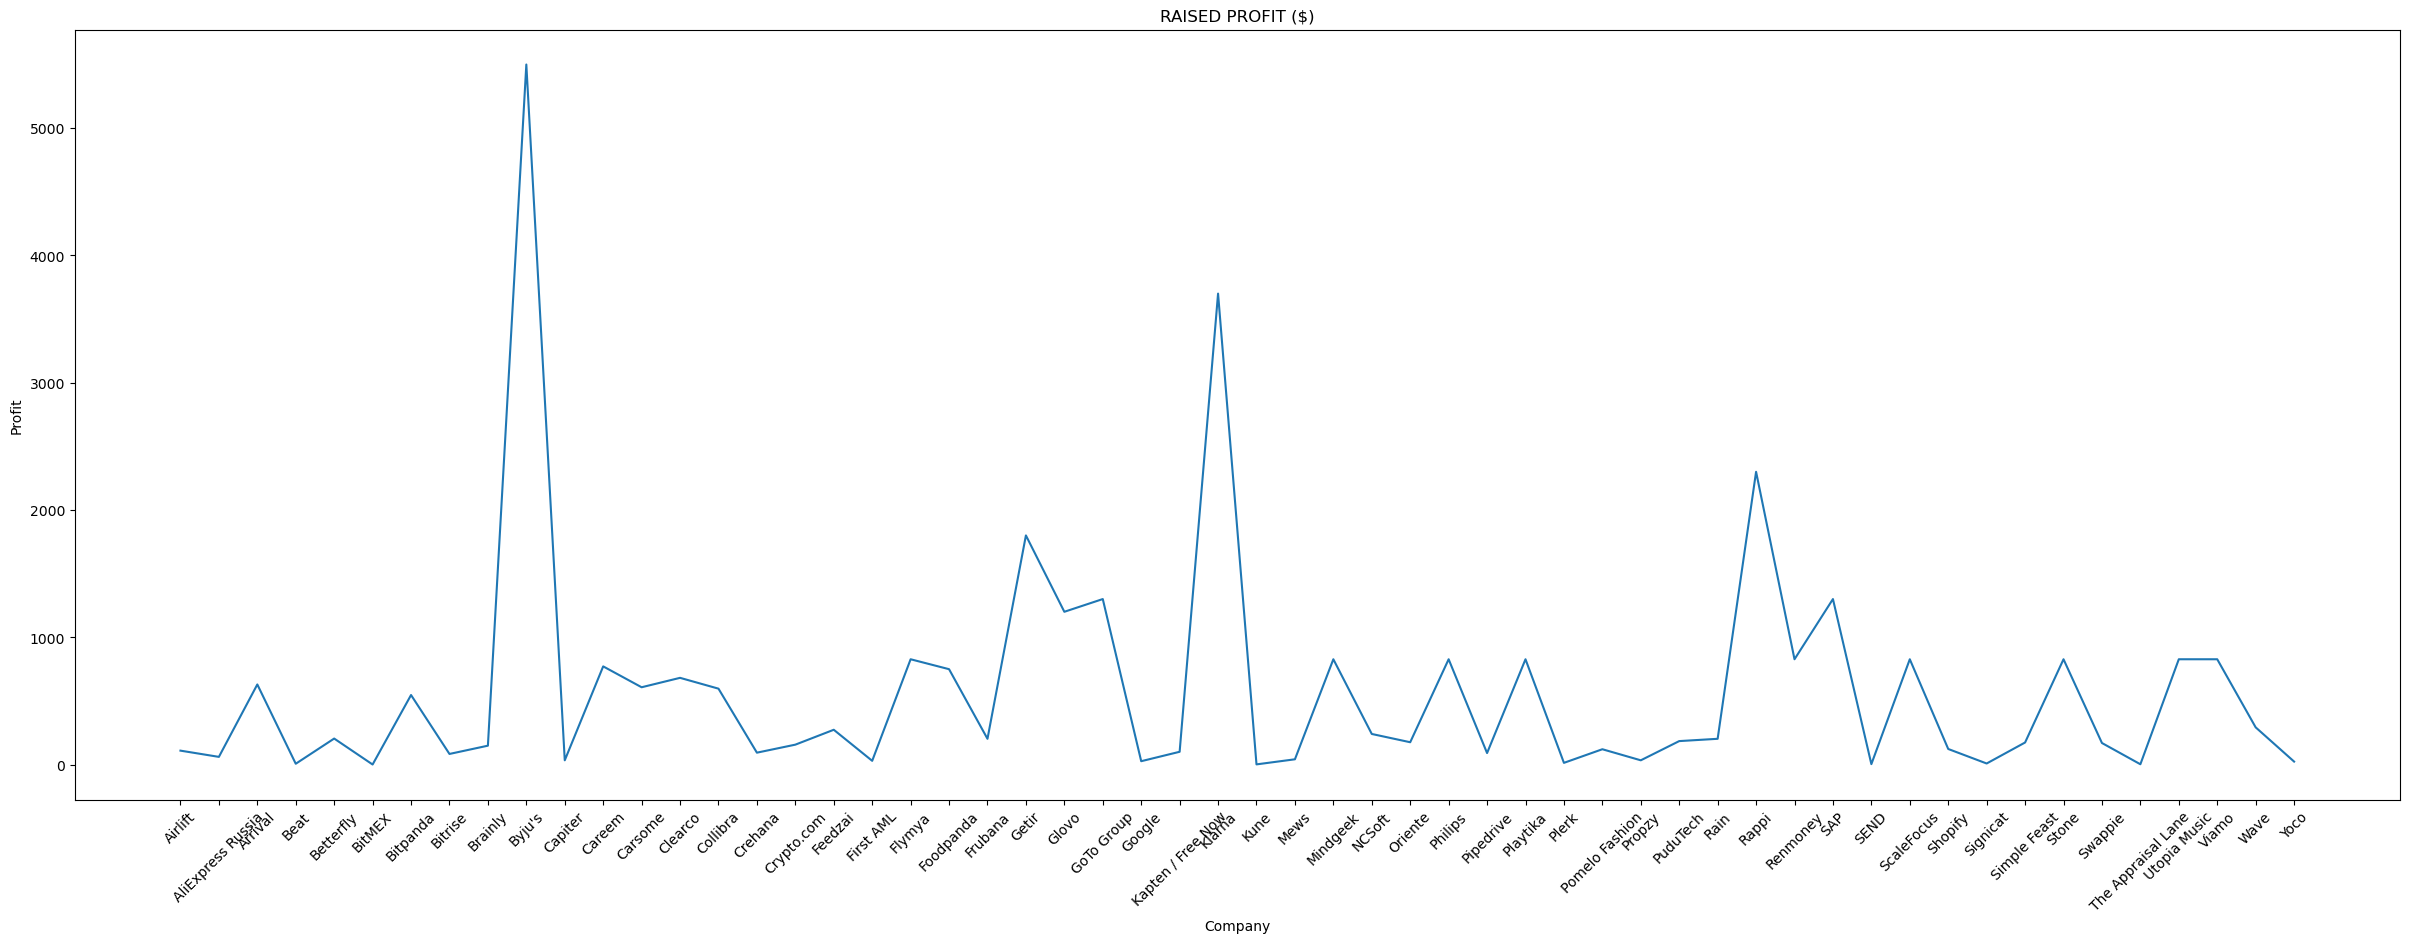

In [35]:
#Raised profit($) after layoff

GrpBy = df.groupby(["Company"])["$ Raised Profit"].sum()
GrpBy = GrpBy.reset_index()

plt.figure(figsize=(30,10))
sns.lineplot(x="Company", y="$ Raised Profit", data=GrpBy)
plt.title("RAISED PROFIT ($)")
plt.xlabel("Company")
plt.ylabel("Profit")
plt.xticks(rotation=45)